In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns

In [2]:
# Import the data
data = pd.read_csv("emotions.csv")
print(data.info())
data2 = pd.read_csv("emotions.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None


In [3]:
fft_data = data.loc[:,'fft_0_b':'fft_749_b']

In [4]:
fft_data

,fft_0_b,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,-508.0,438.00,-222.00,-222.00,438.00,143.0,59.40,5.05,5.05,59.40,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,126.0,-4.00,7.42,7.42,-4.00,81.6,-22.30,35.30,35.30,-22.30,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,-85.9,361.00,-62.20,-62.20,361.00,-558.0,684.00,-152.00,-152.00,684.00,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,69.5,3.89,12.10,12.10,3.89,-188.0,274.00,-200.00,-200.00,274.00,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,226.0,-27.40,147.00,147.00,-27.40,301.0,-8.48,138.00,138.00,-8.48,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,105.0,3.37,29.20,29.20,3.37,151.0,-19.40,8.89,8.89,-19.40,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,-23.0,202.00,-81.60,-81.60,202.00,-345.0,404.00,-205.00,-205.00,404.00,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-288.0,312.00,-259.00,-259.00,312.00,-186.0,276.00,-199.00,-199.00,276.00,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,109.0,2.48,49.00,49.00,2.48,-230.0,216.00,-92.40,-92.40,216.00,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


<Axes: >

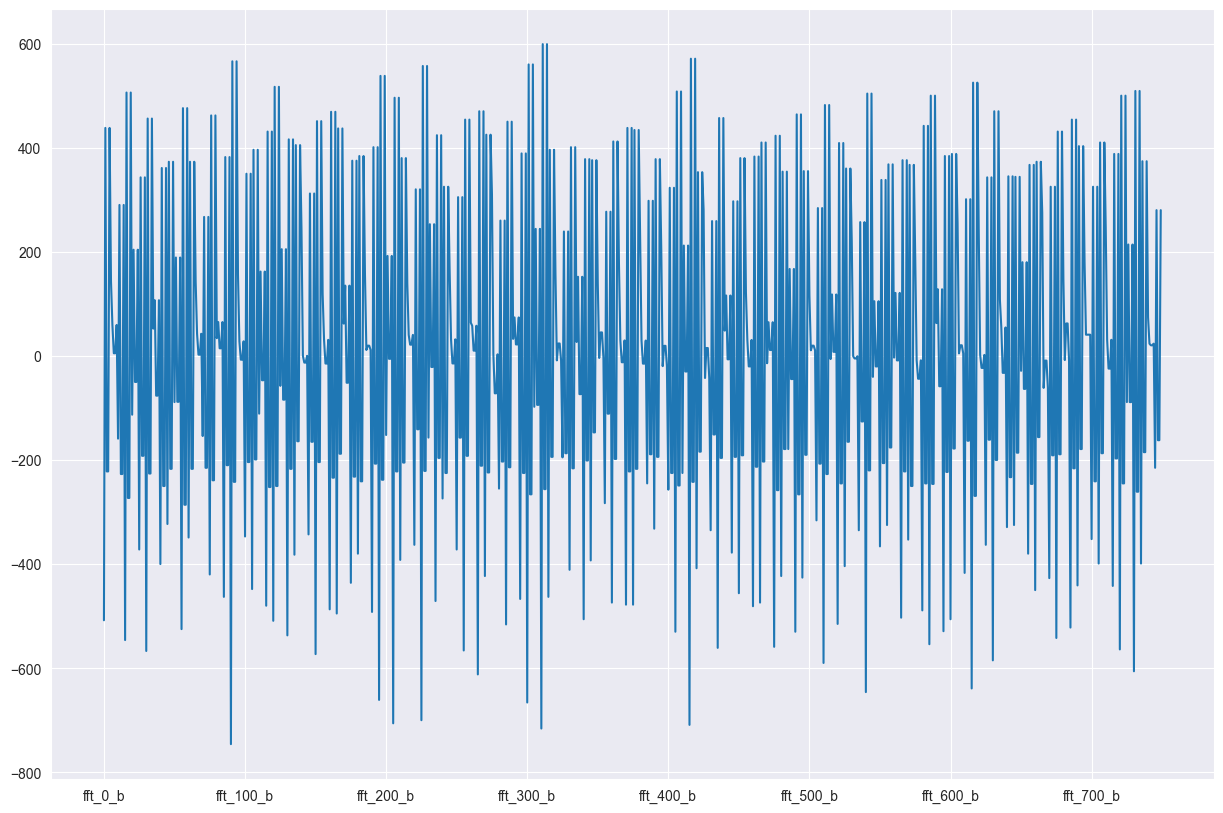

In [5]:
fft_data.iloc[0,:].plot(figsize=(15,10))

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])

In [7]:
y = data.pop('label')
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=48)
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [8]:
inputs = tf.keras.Input(shape=(X_train.shape[1],1))

gru = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(3, activation='softmax')(flat)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198144    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,011
Trainable params: 2,155,011
Non-trainable params: 0
_________________________________________________________________


In [9]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=32,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [11]:
model,history = train_model(model, X_train, y_train,X_test, y_test, save_to= './', epoch = 10) 

Epoch 1/10
47/47 [==============================] - ETA: 0s - loss: 33.6134 - accuracy: 0.7869
Epoch 1: val_accuracy improved from -inf to 0.88125, saving model to .\_best_model.h5
47/47 [==============================] - 274s 6s/step - loss: 33.6134 - accuracy: 0.7869 - val_loss: 3.8143 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 2/10
47/47 [==============================] - ETA: 0s - loss: 4.2319 - accuracy: 0.9135
Epoch 2: val_accuracy improved from 0.88125 to 0.96406, saving model to .\_best_model.h5
47/47 [==============================] - 272s 6s/step - loss: 4.2319 - accuracy: 0.9135 - val_loss: 1.3477 - val_accuracy: 0.9641 - lr: 9.0484e-04
Epoch 3/10
47/47 [==============================] - ETA: 0s - loss: 3.6941 - accuracy: 0.9290
Epoch 3: val_accuracy did not improve from 0.96406
47/47 [==============================] - 275s 6s/step - loss: 3.6941 - accuracy: 0.9290 - val_loss: 5.0146 - val_accuracy: 0.8891 - lr: 8.1873e-04
Epoch 4/10
47/47 [==============================] - E

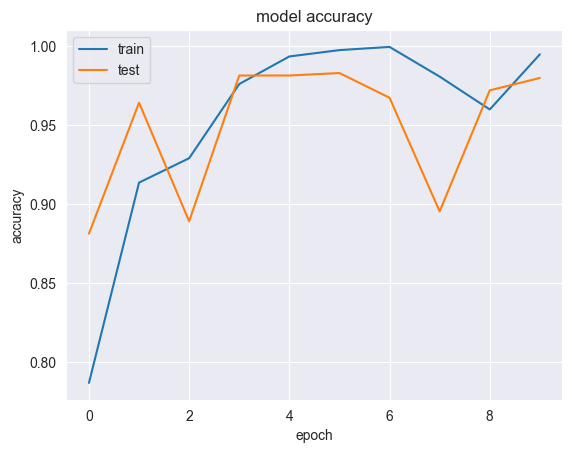

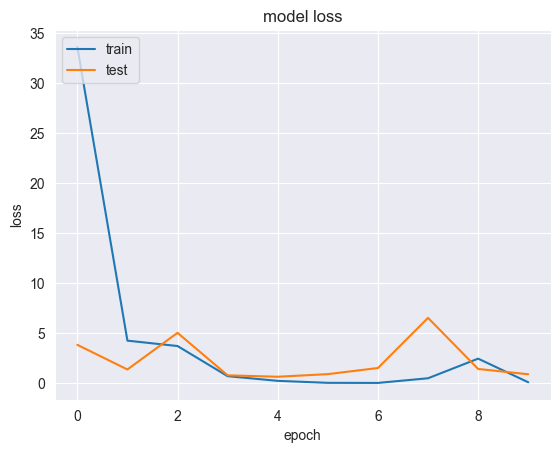

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

new_record = pd.DataFrame([[27,32,31.8,25,28.9,4.99,1.95,6.21,3.49,-3.51,27.5,32.1,29.8,24.8,31.3,21.6,30,27.7,21.8,30,30,35.3,31.7,24.2,25.2,29,30.8,38,29.3,29.1,5.97,2.13,2.08,2.96,1.35,-2.45,-3.17,-1.94,0.579,6.18,-1.5,1.36,-8.29,-4.49,2.26,-8.42,-5.3,-4.02,-2.38,4.83,-7.47,-0.768,-10.4,-7.45,0.909,0.951,4.53,-6.35,-5.07,-3.92,10.1,5.41,12.8,7.66,37.9,0.809,1.34,-0.563,1.18,10.5,18.6,29.9,255,-164,-1350,29800,2990,72700,11500,5780000,39800,6770,205000,-77800,37100000,15000000,501000,49100000,3320000,36000000000,55.8,47.9,66.4,43.6,134,12,8.37,-3.27,7.94,34.8,43.8,39.5,51.8,35.5,83.8,40,37,66.4,35.6,98.7,55.8,47.9,52.9,41.5,134,48.1,41.2,63.2,43.6,83.6,3.77,2.49,-14.6,-0.126,-14.9,-12,-8.37,-1.03,-6.01,-49.7,-4.32,-1.69,-11.3,-8.07,0.267,-15.8,-10.9,13.6,-5.89,-34.8,-8.09,-4.18,3.27,-7.94,15.2,7.71,6.68,-10.3,-2.06,49.9,-2.35,15.7,1.15,3.15,-60,9.41,6.1,5.82,2.09,-9.42,7.68,20.6,1.27,6.15,-37.8,-2.35,15.7,1.15,3.15,-50.6,10.8,21.8,6.97,5.25,-60,7.06,22.2,8.5,17.7,-45.2,10,4.92,0.114,3,12.8,-3.07,-1.18,-5.7,0.901,22.2,0.616,-1.62,-7.23,-11.6,7.38,-13.1,-6.1,-5.82,-2.09,9.42,-9.41,-6.54,-7.34,-14.6,-5.38,3.69,-0.436,-1.53,-12.5,-14.8,16.8,-17,-5.18,2.72,-39.6,-2.83,-26.5,25,6.5,41.5,-18.8,-0.104,-17,181,36.7,-298,-25.5,191,-0.0383,-120,-105,-107,30,10.1,-5.18,36.7,18.2,-46.6,72.6,8.71,13.9,-18.7,-17.3,-41.4,-4.38,-4.8,2.72,-298,-46.6,558,221,-344,45.9,183,215,87.8,-16.5,-44.4,-39.6,-25.5,72.6,221,882,-117,104,-85.3,93.5,-305,13.6,-97.6,-2.83,191,8.71,-344,-117,1120,-146,-274,-143,-30.9,184,60.7,-26.5,-0.0383,13.9,45.9,104,-146,273,91.4,19.4,-17,16.2,-34.5,25,-120,-18.7,183,-85.3,-274,91.4,279,181,65.9,-69.9,-33.9,6.5,-105,-17.3,215,93.5,-143,19.4,181,447,-70.7,12.4,-18.8,41.5,-107,-41.4,87.8,-305,-30.9,-17,65.9,-70.7,621,5.1,17.2,-18.8,30,-4.38,-16.5,13.6,184,16.2,-69.9,12.4,5.1,88.7,-10.9,-0.104,10.1,-4.8,-44.4,-97.6,60.7,-34.5,-33.9,-18.8,17.2,-10.9,54.2,1650,1120,625,475,290,201,116,52.1,12.9,1.29,0.00000000000000521,0.371,-3.54,-14.2,-5.8,0.612,6.35,6.75,5.24,4.26,5.74,6.21,1.27,2.79,-9.57,10.8,4.54,0.783,-0.0169,-0.307,0.749,0.826,-0.229,0.319,-1.05,5.27,-10.6,0.689,-0.649,0.339,-0.202,-0.183,0.116,0.648,-0.0000225,-4.87,0.353,0.156,-0.639,-0.671,-0.144,-0.0197,-1.55,0.325,0.0171,-0.254,0.549,1.16,0.221,-0.0407,0.872,-0.89,-0.0175,-0.928,-0.0534,0.188,-0.466,0.878,0.0647,-0.838,0.854,-0.146,-0.0646,-0.432,0.275,0.665,-0.281,0.315,2.9,-0.64,0.115,-0.829,-2.54,-0.381,0.0345,4.98,1.21,1.31,-1.21,-1.25,0,5,4.92,4.96,0,3120,4630,1910,3260,2350,2140,1890,4170,4080,3580,1430,4000,3540,-477,104,2720,982,1690,5480,4030,3500,4750,6110,4510,6510,4970,11300,4610,3630,3000,5130,7010,4380,9550,8860,4240,3840,6240,2920,4820,5740,-774,4660,4320,2780,6130,7450,2220,4150,1430,5440,6220,3870,2780,3320,4780,927,1290,3950,3310,7740,2880,9270,3350,3160,2080,8970,3520,2870,3390,2770,5160,4700,3480,3790,122,-8.15,46.3,46.3,-8.15,177,11.7,-5.67,-5.67,11.7,111,4.02,35.1,35.1,4.02,75.3,-53,34.5,34.5,-53,96.2,-28.3,36.8,36.8,-28.3,88.2,12.9,-5.65,-5.65,12.9,192,17.7,-12.8,-12.8,17.7,153,13.6,1.93,1.93,13.6,166,2.21,-40.1,-40.1,2.21,190,-13.3,10.7,10.7,-13.3,190,11.2,-36,-36,11.2,163,16.8,-15.5,-15.5,16.8,197,-16.9,-16.5,-16.5,-16.9,182,2.98,-46.7,-46.7,2.98,124,-0.411,-28.8,-28.8,-0.411,184,0.612,-30.6,-30.6,0.612,180,25.7,-34.8,-34.8,25.7,171,24.6,-39.4,-39.4,24.6,142,5.46,15,15,5.46,95.9,-5.87,14.9,14.9,-5.87,88.1,33.2,-0.703,-0.703,33.2,120,-15.3,-2.83,-2.83,-15.3,144,10.9,-14.6,-14.6,10.9,140,24,-33.4,-33.4,24,173,8.45,-67.2,-67.2,8.45,107,3.38,-3.27,-3.27,3.38,173,29.8,-63,-63,29.8,131,-15.9,12,12,-15.9,116,-6.26,23.8,23.8,-6.26,108,-8.39,29,29,-8.39,148,-25.2,38.5,38.5,-25.2,155,5.17,9.5,9.5,5.17,174,19.5,-30.6,-30.6,19.5,241,17.4,-28.5,-28.5,17.4,162,8.41,-7.48,-7.48,8.41,110,11.2,-21.6,-21.6,11.2,93.8,-11.7,19.3,19.3,-11.7,140,2.14,-12.3,-12.3,2.14,94.3,1.3,5.71,5.71,1.3,132,-20.6,13.3,13.3,-20.6,170,10.4,4.7,4.7,10.4,164,15.6,-43.9,-43.9,15.6,167,12,-25.7,-25.7,12,125,7.91,23.8,23.8,7.91,110,4.23,14.7,14.7,4.23,179,-11.4,13.6,13.6,-11.4,187,-2.54,-25.4,-25.4,-2.54,112,16.2,-13.3,-13.3,16.2,110,-4.74,12.7,12.7,-4.74,62.6,-10.3,7.13,7.13,-10.3,146,30.1,-47.1,-47.1,30.1,154,-15.1,20.9,20.9,-15.1,119,-8.55,-0.635,-0.635,-8.55,98.6,-0.148,1.99,1.99,-0.148,162,-9.01,-10.8,-10.8,-9.01,156,22.2,-28.5,-28.5,22.2,59.7,14.9,24.1,24.1,14.9,42.3,-37.4,47.4,47.4,-37.4,149,0.331,-19.1,-19.1,0.331,101,-8.53,-9.46,-9.46,-8.53,196,-20.8,-43,-43,-20.8,130,-5.31,-65.6,-65.6,-5.31,170,29.9,-90.7,-90.7,29.9,91.8,-13.4,-0.785,-0.785,-13.4,125,1.24,-44.2,-44.2,1.24,71.5,-16.8,0.802,0.802,-16.8,175,5.56,-23.6,-23.6,5.56,102,-6.72,7.38,7.38,-6.72,121,1.13,-11.8,-11.8,1.13,167,-13.8,-28.9,-28.9,-13.8,92.9,-10.1,26.8,26.8,-10.1,157,18.6,-41.4,-41.4,18.6,156,-14.9,-26,-26,-14.9,99.1,0.787,-16.3,-16.3,0.787,186,37.8,-40.6,-40.6,37.8,133,14.4,-15.7,-15.7,14.4,130,3.36,-11.7,-11.7,3.36,105,6.72,-18.8,-18.8,6.72,135,-5.75,19.3,19.3,-5.75,208,26,-27.7,-27.7,26,100,23.2,25.1,25.1,23.2,81.3,-11,79.2,79.2,-11,125,19.1,58.1,58.1,19.1,142,15.4,11.3,11.3,15.4,93.4,-17.1,38.7,38.7,-17.1,97.1,0.328,39.8,39.8,0.328,130,18.7,13.8,13.8,18.7,107,4.65,18.9,18.9,4.65,46.1,-15.1,26.4,26.4,-15.1,35.3,-15,24.2,24.2,-15,105,-33.2,49.6,49.6,-33.2,68.3,-24.2,35.1,35.1,-24.2,62.4,17.4,0.147,0.147,17.4,156,-12.8,29.7,29.7,-12.8,181,4.24,15.3,15.3,4.24,230,28.9,-56,-56,28.9,205,-6.11,-43.8,-43.8,-6.11,206,0.458,-42.3,-42.3,0.458,146,-5.22,-27.3,-27.3,-5.22,166,-4.99,-17.8,-17.8,-4.99,272,52.1,-90.2,-90.2,52.1,198,25.1,-91.4,-91.4,25.1,170,-19.5,-24.1,-24.1,-19.5,143,-6.27,10.9,10.9,-6.27,159,10.8,-13.6,-13.6,10.8,190,2.08,-19.1,-19.1,2.08,253,40.8,-80,-80,40.8,119,12.7,-5.95,-5.95,12.7,202,-12.1,20.1,20.1,-12.1,265,37.6,-34.9,-34.9,37.6,183,2.68,-34.8,-34.8,2.68,69.2,-50.7,77.4,77.4,-50.7,217,-8.13,-11.3,-11.3,-8.13,160,0.225,-17.6,-17.6,0.225,183,-1.83,-23,-23,-1.83,168,2.69,-34.6,-34.6,2.69,50.2,-24.5,39.9,39.9,-24.5,146,-10.6,4.82,4.82,-10.6,152,7.8,24,24,7.8,88.8,-0.442,33.1,33.1,-0.442,168,10.3,0.258,0.258,10.3,175,7.51,-28.1,-28.1,7.51,92.5,13.9,31.8,31.8,13.9,164,-14.8,26.9,26.9,-14.8,198,12.8,-17.8,-17.8,12.8,155,34.7,-16.4,-16.4,34.7,222,28,-18.8,-18.8,28,173,18.4,-16.3,-16.3,18.4,154,7.85,-20.7,-20.7,7.85,106,-47,63.6,63.6,-47,165,-26.1,12.3,12.3,-26.1,202,3.32,-31.8,-31.8,3.32,181,-11.5,-6.99,-6.99,-11.5,144,-8.51,25.7,25.7,-8.51,166,12.5,-11.6,-11.6,12.5,191,-7.42,11.5,11.5,-7.42,143,-21.6,24.2,24.2,-21.6,204,0.703,-20.7,-20.7,0.703,159,-24.5,44.9,44.9,-24.5,136,-24.8,5.17,5.17,-24.8,150,-1.71,-18.8,-18.8,-1.71,230,-5.09,-18,-18,-5.09,143,-20.7,39.2,39.2,-20.7,117,-30.4,-10.5,-10.5,-30.4,103,-65,44.2,44.2,-65,138,-35.4,4.38,4.38,-35.4,150,-10.3,-16.3,-16.3,-10.3,153,-19.1,10.4,10.4,-19.1,177,1.54,-59.8,-59.8,1.54,110,-6.26,6.07,6.07,-6.26,30.1,33.8,35.1,27.9,23.6,1.23,1.56,0.449,2.18,-6.81,29.9,35.3,31.7,24.3,25,29,30.8,38,29.3,29,29.6,33,35.2,27.6,18.1,31.8,36.1,35.5,30.4,22.3,0.85,4.53,-6.36,-5.01,-4.01,0.307,2.31,-3.51,-3.3,6.94,-1.87,-0.797,-3.83,-6.09,2.68,-0.543,-2.22,2.86,1.71,10.9,-2.72,-5.32,2.53,-1.08,6.69,-2.18,-3.11,-0.328,-2.79,-4.26,9.61,5.57,12.1,7.49,37.8,-1.21,-0.913,-0.0333,-1.16,-11.1,309,35.2,35.6,-188,11400,30000,2450,53700,10200,6140000,383000,7230,-37100,-103000,187000000,18100000,272000,27000000,3120000,40200000000,63.9,47.9,63.3,42.8,131,8.49,-2.16,-2.38,-0.491,-26.1,55.4,47.9,53.2,41,131,47.6,41.2,63.3,42.8,84,43.4,44.6,54.7,39.7,101,63.9,45.8,60.9,42.3,105,7.78,6.79,-10.1,-1.85,47.1,12,3.33,-1.51,1.3,30.5,-8.49,2.16,-7.7,-1.36,26.1,4.25,-3.45,8.57,3.15,-16.5,-16.3,-4.63,2.38,0.491,-21,-20.5,-1.17,-6.2,-2.66,-4.47,7.63,21.9,7.35,4.69,-58,6.5,2.09,1.62,8.83,5.59,11.3,21.9,7.35,4.69,-58,7.63,22.1,8.76,17.2,-47,15.7,24,10.7,13.5,-38,14.1,25.9,8.97,15.4,-52.4,3.64,-0.203,-1.41,-12.5,-10.9,-4.41,-2.09,-3.32,-8.83,-20,-2.85,-3.95,-1.62,-10.7,-5.59,-8.05,-1.88,-1.91,3.65,-9.02,-6.5,-3.75,-0.216,1.81,5.35,1.55,-1.87,1.69,-1.84,14.4,14.8,-12,3.51,-9.28,-17.9,-42,14.2,12.3,-55.5,6.59,4.43,1.77,-12,269,2.79,-370,20.6,140,65.5,-156,-33.1,-32.9,-13.5,-23.5,3.51,2.79,13.2,-21.9,19,-29.7,-3.93,1.61,-32.3,-21.1,4.35,-2.55,-9.28,-370,-21.9,598,11.6,-81.1,-69.3,185,242,-4.09,11.6,27,-17.9,20.6,19,11.6,813,85,-66.2,-35.2,153,-450,42.3,32.4,-42,140,-29.7,-81.1,85,1160,36.7,-22.5,-49.9,183,-116,-121,14.2,65.5,-3.93,-69.3,-66.2,36.7,183,-24.9,54.8,30.1,6.4,-28.9,12.3,-156,1.61,185,-35.2,-22.5,-24.9,154,-26.4,93.7,-2.31,20.6,-55.5,-33.1,-32.3,242,153,-49.9,54.8,-26.4,693,-189,48.7,48.8,6.59,-32.9,-21.1,-4.09,-450,183,30.1,93.7,-189,496,-34.9,-53.3,4.43,-13.5,4.35,11.6,42.3,-116,6.4,-2.31,48.7,-34.9,29,11.5,1.77,-23.5,-2.55,27,32.4,-121,-28.9,20.6,48.8,-53.3,11.5,36.3,1200,1370,944,568,157,139,57.4,16.6,11.9,2.09,-0.0000000000000196,0.703,-2.23,-4.18,-3.62,4.09,6.26,6.8,4.02,-0.0993,6.22,5.07,1.48,-8.16,-5.39,5.37,1.4,0.109,0.194,-0.271,2.08,-0.23,-0.273,0.713,2.34,3.86,-4.77,-0.461,0.306,-0.381,0.665,0.343,1.81,0.379,-2.33,-1.93,0.479,-0.846,0.675,0.552,0.00797,-0.559,-1.83,0.527,0.237,1.16,-2.28,-1.33,0.125,0.178,0.867,7.26,0.497,2.83,5.06,0.707,-1.13,-0.264,-3.62,2.32,-6.19,-0.0342,0.368,0.534,-1.47,-3.51,0.312,-1.78,-0.97,-0.625,-0.57,1.35,2.05,2.38,0.875,-2.5,-8.18,-0.905,8.03,6.11,4.96,5,4.95,4.97,0,2960,3800,1710,4060,3710,3070,1830,3210,3890,3440,2920,3000,3320,1050,2210,5720,2710,1810,5370,5270,332,9360,8450,3560,3690,2720,127,3520,5220,4430,4200,9600,2830,6940,10300,4400,5080,2190,3460,3940,5930,1060,5120,5340,2440,3990,10000,1610,5820,5840,3010,5540,7590,4260,3660,5590,6340,6340,4580,3870,6730,3650,6280,6970,5330,4820,14300,5470,2060,4420,4650,5080,5850,6350,2700,127,5.49,-14.5,-14.5,5.49,127,4.71,-9.31,-9.31,4.71,108,6.8,-21.4,-21.4,6.8,131,-6.41,21.8,21.8,-6.41,213,26.9,-30.2,-30.2,26.9,95.9,22.1,27.5,27.5,22.1,85.3,-9.75,76.9,76.9,-9.75,121,17.8,60.4,60.4,17.8,146,16.7,9.16,9.16,16.7,89.5,-18.5,40.8,40.8,-18.5,101,1.67,37.8,37.8,1.67,126,17.3,15.8,15.8,17.3,110,5.99,17,17,5.99,42.4,-16.4,28.3,28.3,-16.4,39,-13.6,22.3,22.3,-13.6,102,-34.5,51.4,51.4,-34.5,71.9,-22.9,33.3,33.3,-22.9,58.8,16.1,1.89,1.89,16.1,160,-11.5,28,28,-11.5,177,2.96,17,17,2.96,233,30.2,-57.6,-57.6,30.2,202,-7.35,-42.2,-42.2,-7.35,209,1.68,-43.9,-43.9,1.68,143,-6.43,-25.8,-25.8,-6.43,169,-3.8,-19.3,-19.3,-3.8,268,51,-88.7,-88.7,51,201,26.3,-92.8,-92.8,26.3,167,-20.6,-22.7,-22.7,-20.6,146,-5.16,9.51,9.51,-5.16,155,9.66,-12.3,-12.3,9.66,193,3.16,-20.4,-20.4,3.16,250,39.8,-78.7,-78.7,39.8,122,13.7,-7.16,-7.16,13.7,199,-13.1,21.3,21.3,-13.1,268,38.6,-36.1,-36.1,38.6,180,1.7,-33.7,-33.7,1.7,71.9,-49.7,76.4,76.4,-49.7,214,-9.07,-10.3,-10.3,-9.07,163,1.14,-18.6,-18.6,1.14,180,-2.72,-22,-22,-2.72,171,3.56,-35.5,-35.5,3.56,47.6,-25.3,40.8,40.8,-25.3,148,-9.76,3.93,3.93,-9.76,150,6.99,24.9,24.9,6.99,91.4,0.338,32.3,32.3,0.338,165,9.57,1.05,1.05,9.57,178,8.24,-28.8,-28.8,8.24,90,13.2,32.6,32.6,13.2,166,-14.2,26.2,26.2,-14.2,195,12.1,-17.2,-17.2,12.1,157,35.3,-17,-17,35.3,220,27.4,-18.3,-18.3,27.4,175,19,-16.9,-16.9,19,151,7.31,-20.2,-20.2,7.31,108,-46.5,63.2,63.2,-46.5,163,-26.6,12.7,12.7,-26.6,204,3.77,-32.2,-32.2,3.77,179,-11.9,-6.66,-6.66,-11.9,146,-8.14,25.4,25.4,-8.14,164,12.1,-11.3,-11.3,12.1,193,-7.12,11.4,11.4,-7.12,141,-21.8,24.3,24.3,-21.8,206,0.911,-20.8,-20.8,0.911,156,-24.7,44.9,44.9,-24.7,139,-24.7,5.26,5.26,-24.7,148,-1.77,-19,-19,-1.77,233,-5.1,-17.7,-17.7,-5.1,141,-20.6,38.8,38.8,-20.6,119,-30.6,-10,-10,-30.6,100,-64.8,43.5,43.5,-64.8,140,-35.7,5.23,5.23,-35.7,148,-9.86,-17.4,-17.4,-9.86,155,-19.7,11.8,11.8,-19.7,175,2.23,-61.7,-61.7,2.23,112,-7.03,8.64,8.64,-7.03,111,-22.8,40.9,40.9,-22.8,153,0.055,31.7,31.7,0.055,112,-17.3,35.3,35.3,-17.3,133,-41.3,14.1,14.1,-41.3,122,-24,37.6,37.6,-24,161,13.7,-15.5,-15.5,13.7,189,3,-27,-27,3,163,0.655,-10.4,-10.4,0.655,133,5.07,-0.457,-0.457,5.07,141,-9.97,-6.26,-6.26,-9.97,166,-2.12,-16.5,-16.5,-2.12,193,30.8,-67.1,-67.1,30.8,95.2,-14.2,13.3,13.3,-14.2,163,0.807,-7.35,-7.35,0.807,80.9,6.09,7.58,7.58,6.09,83.6,-44,52.6,52.6,-44,161,1.34,8.18,8.18,1.34,197,17.2,-25.1,-25.1,17.2,200,-1.13,-26.4,-26.4,-1.13,130,-5,22.4,22.4,-5,77.8,-30.2,36.6,36.6,-30.2,200,-13.4,-22.8,-22.8,-13.4,188,5.99,-11.8,-11.8,5.99,126,17.6,-1.26,-1.26,17.6,123,-16.1,48.7,48.7,-16.1,110,-17,36,36,-17,91.9,5.36,36.3,36.3,5.36,107,-40.1,43.2,43.2,-40.1,179,-15.2,9.27,9.27,-15.2,136,20.3,-23.7,-23.7,20.3,130,-19.4,43.4,43.4,-19.4,182,0.771,-9.4,-9.4,0.771,123,-11.4,4.3,4.3,-11.4,171,-1.07,7.1,7.1,-1.07,182,15.9,-10.2,-10.2,15.9,128,17.8,-3.22,-3.22,17.8,164,-17.1,39,39,-17.1,92.5,-12.6,74.9,74.9,-12.6,121,0.195,16.8,16.8,0.195,123,-18.3,50.5,50.5,-18.3,171,12,-17.5,-17.5,12,128,25.8,-22.7,-22.7,25.8,156,-35.3,-0.207,-0.207,-35.3,188,-21.6,-10.1,-10.1,-21.6,152,5.66,-27.2,-27.2,5.66,125,-26.5,-0.406,-0.406,-26.5,221,-0.404,-74.9,-74.9,-0.404,135,2.42,-30.2,-30.2,2.42,181,5.53,-23.6,-23.6,5.53,154,9.2,-7.39,-7.39,9.2,108,0.662,20.9,20.9,0.662,149,-31.7,35.9,35.9,-31.7,206,-0.108,-14.3,-14.3,-0.108,143,-2.67,-1.34,-1.34,-2.67,181,-18.4,-8.48,-8.48,-18.4,167,-13.6,1.72,1.72,-13.6,150,6.51,-17.3,-17.3,6.51,173,-8.2,-1.24,-1.24,-8.2,106,-20.1,43,43,-20.1,126,10.6,36.4,36.4,10.6,167,-34,7.82,7.82,-34,152,11.6,-34.3,-34.3,11.6,158,22.8,15.5,15.5,22.8,149,-24.8,59.2,59.2,-24.8,190,10.2,29.2,29.2,10.2,185,24.7,42.5,42.5,24.7,275,25.6,-42.6,-42.6,25.6,180,1.11,17.6,17.6,1.11,96.4,10.7,28.7,28.7,10.7,126,-10.9,21.6,21.6,-10.9,155,-16.9,13.5,13.5,-16.9,169,9.52,-19.7,-19.7,9.52,178,-26.4,-2.82,-2.82,-26.4,181,1.95,1.81,1.81,1.95,110,-6.71,22.8,22.8,-6.71]], columns=data2.columns[:-1])
new_label = model.predict(new_record)
print(f"Predicted label for new record: {new_label}")

class_labels = ['Positive', 'Neutral', 'Negative']
predicted_class = class_labels[np.argmax(new_label)]

# Print the predicted class label
print("Predicted label for new record:", predicted_class)

Test Accuracy: 97.969%
1/1 [==============================] - 1s 660ms/step
Predicted label for new record: [[0. 1. 0.]]
Predicted label for new record: Neutral


20/20 [==============================] - 17s 859ms/step


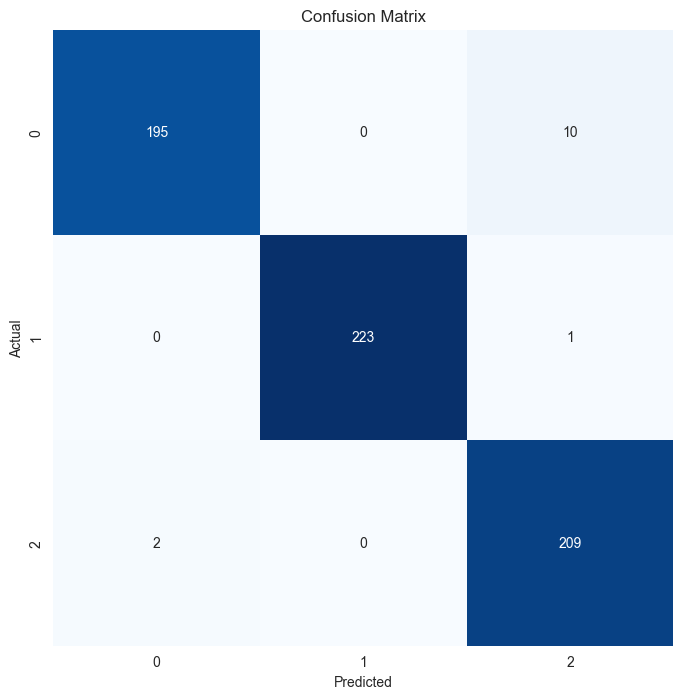

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       205
           1       1.00      1.00      1.00       224
           2       0.95      0.99      0.97       211

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



In [14]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test = y_test.idxmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [15]:
import pickle
with open('C:/Users/Owner/PycharmProjects/pythonProject2/helmy/model2.pkl', 'wb') as file:
    pickle.dump(model, file)